In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# データの読み込み

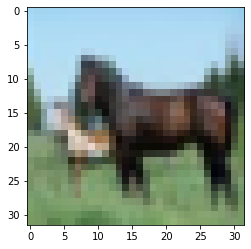

In [58]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()
cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
image = x_train[12]
plt.imshow(image)
plt.show()

# ImageDataGenerator()

gen = ImageDataGenerator('拡張設定').flow(x, batch_size)  
'拡張設定'：この後詳しく説明  
x：(batch_size, width, height, channel)の4次元のデータを要求される。3次元画像データにbatch_sizeを付け足して4次元にする  
batch_size：まとめて処理する画像枚数  
genに拡張した画像のイテレータが返される    

## 画像拡張と表示の関数

In [59]:
def show_images(image, generator):
    # channel, height, width = image.shape
    # image = image.reshape(1, channel, height, width)
    height, width, channel = image.shape
    x = image.reshape(1, height, width, channel) # 4次元化
    gen = generator.flow(x, batch_size=1) # 画像拡張
    print(gen.next().shape)
    
    plt.figure(figsize=(9, 9))
    for i in range(9):
        gen_img = gen.next()[0].astype(np.uint8) # 4次元から3次元にして、画像化
        plt.subplot(3, 3, i+1)
        plt.imshow(gen_img)
    plt.show()

## rotation_range
指定された角度の範囲でランダムに回転を行う

(1, 32, 32, 3)


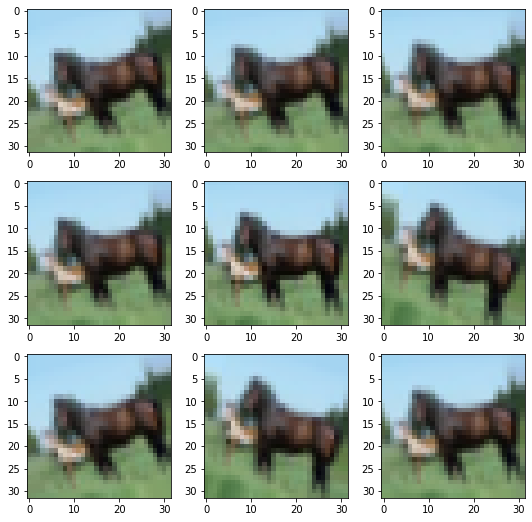

In [60]:
generator = ImageDataGenerator(rotation_range=20)
show_images(image, generator)

## width_shift_range
水平方向にシフトする

(1, 32, 32, 3)


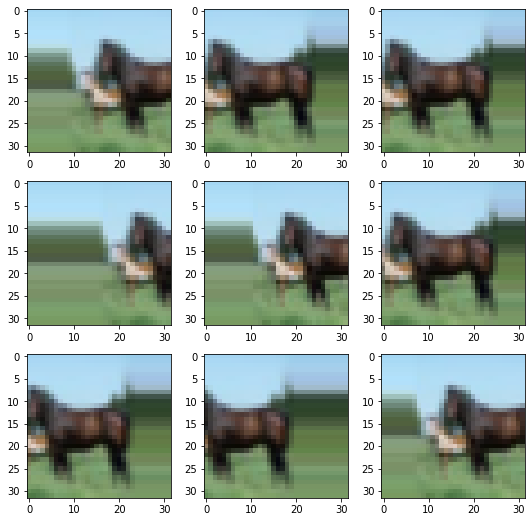

In [61]:
generator = ImageDataGenerator(width_shift_range=0.5)
show_images(image, generator)

## height_shift_range
垂直方向にシフトする

(1, 32, 32, 3)


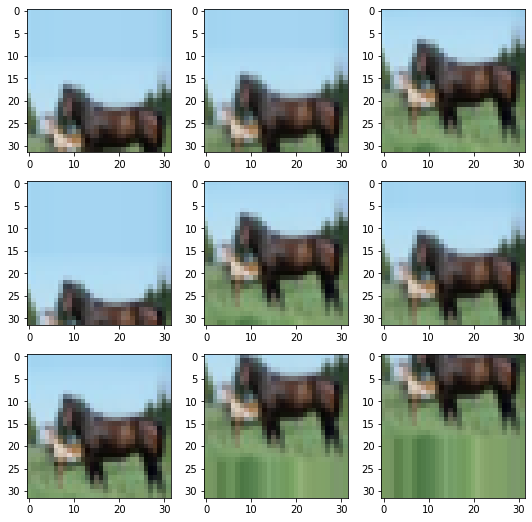

In [62]:
generator = ImageDataGenerator(height_shift_range=0.5)
show_images(image, generator)

## shear_range
シアー変換を行う。
指定された角度内でランダムに画像を引っ張る。

(1, 32, 32, 3)


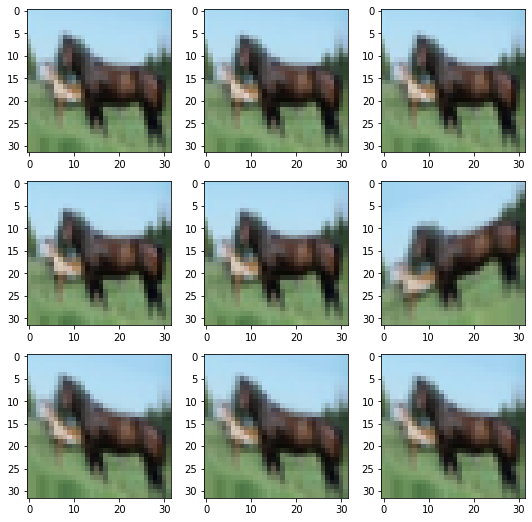

In [63]:
generator = ImageDataGenerator(shear_range=20)
show_images(image, generator)

## zoom_range
指定された範囲内で水平、垂直方向を拡大する

(1, 32, 32, 3)


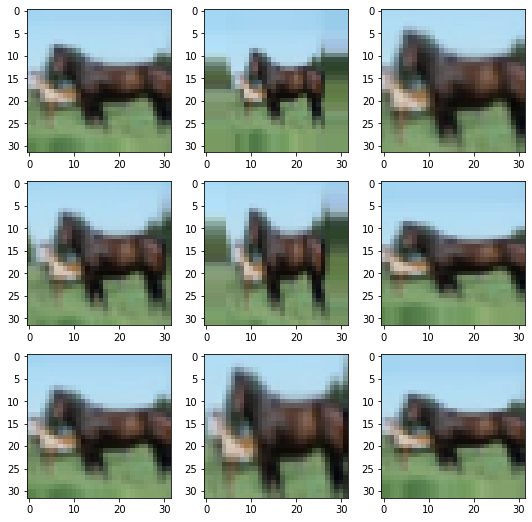

In [64]:
generator = ImageDataGenerator(zoom_range=0.4)
show_images(image, generator)

## horizontal_flip, vertical_flip
水平、垂直方向に反転させる

(1, 32, 32, 3)


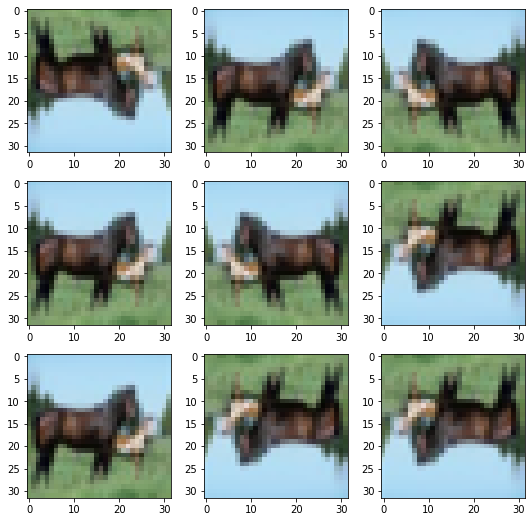

In [65]:
generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_images(image, generator)

# モデル構築

In [66]:
n_class = 10
t_train = tf.keras.utils.to_categorical(t_train, n_class)
t_test = tf.keras.utils.to_categorical(t_test, n_class)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 学習

gen = generator.flow(x, t, batch_size)  
x：batchsize+画像データ  
t：答えラベル  
batch_size：batch size  

gen：(x, t)のイテレータ  
x：生成された画像データ  
t：生成された画像データのラベル

In [67]:
gen = generator.flow(x_train, t_train, batch_size=32)
print(gen.next()[0].shape)
print(gen.next()[1].shape)

(32, 32, 32, 3)
(32, 10)


In [68]:
x_train = x_train / 255
x_test = x_test / 255
epochs = 20
batch_size = 32

generator = ImageDataGenerator(rotation_range=0.2, horizontal_flip=True)
generator.fit(x_train)

# history = model.fit(x_train, t_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, t_test))
history = model.fit(generator.flow(x_train, t_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5173 - accuracy: 0.4462 - val_loss: 1.1247 - val_accuracy: 0.5918
Epoch 2/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0940 - accuracy: 0.6163 - val_loss: 0.9426 - val_accuracy: 0.6705
Epoch 3/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9382 - accuracy: 0.6728 - val_loss: 0.8186 - val_accuracy: 0.7120
Epoch 4/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8390 - accuracy: 0.7082 - val_loss: 0.7616 - val_accuracy: 0.7372
Epoch 5/20
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7802 - accuracy: 0.7297 - val_loss: 0.7258 - val_accuracy: 0.7504
Epoch 6/20
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7301 - accuracy: 0.7478 - val_loss: 0.7042 - val_accuracy: 0.7526
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6852 - accuracy: 0.7619 - val_loss: 0.6827 -

# 学習結果

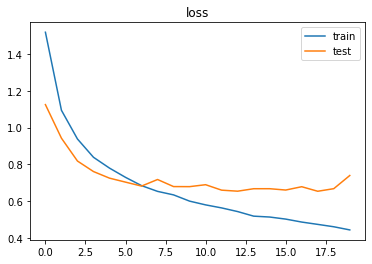

In [69]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.title('loss')
plt.plot(np.arange(len(train_loss)), train_loss, label='train')
plt.plot(np.arange(len(test_loss)), test_loss, label='test')
plt.legend()
plt.show()

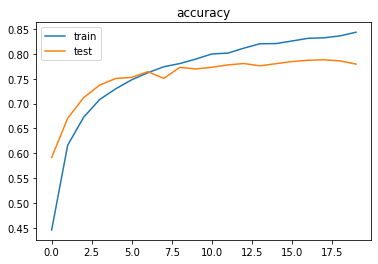

In [70]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.title("accuracy")
plt.plot(np.arange(len(train_acc)), train_acc, label='train')
plt.plot(np.arange(len(test_acc)), test_acc, label='test')
plt.legend()
plt.show()

In [71]:
loss, accuracy = model.evaluate(x_test, t_test)
print("loss:", loss, "accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.7401 - accuracy: 0.7792
loss: 0.7401453256607056 accuracy: 0.77920001745224


# モデルの保存

In [72]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


googleDriveと連携していいかの聞かれるので許可する

In [73]:
import os
path = '/content/drive/MyDrive/cnn_cifar/'

if not os.path.exists(path):
  os.makedirs(path)

model.save(path + "model_cnn_cifar10.h5")

In [74]:
from keras.models import load_model

path = '/content/drive/MyDrive/cnn_cifar/model_cnn_cifar10.h5'

new_model = load_model(path)

new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 15, 15, 64)        18496     
                                                      